# Power Set Generation: Two Approaches

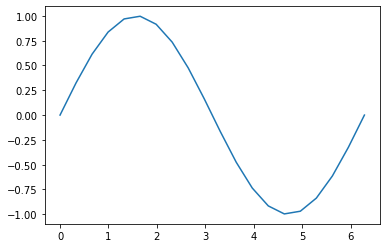

In [3]:
import matplotlib.pyplot as plt
import numpy as np
x = np.linspace(0,2*np.pi, 20)
plt.plot(x, np.sin(x))

## Base-2 Mask Approach

In [187]:
import numpy as np

def GenPowerSet(S):
    
#    S = set(S)  # Convert S to a set (if it isn't already) to ensure
                # unique elements within

    S = list(S) # Convert back into list to access contents
                # via indexing
        
    # Sort list contents (accepts mixed lists of numbers and strings)
    
    # Determine set sizes 
    setSize = len(S) # get number elements in input set
    psetSize = pow(2, setSize) # calc number of elements in powerset
    
    # Value of last index of set S
    lastIndex = setSize - 1
    
    # Initialize base-2 mask
    #bMask = [[False]*setSize]*psetSize
    bMask = np.zeros([pSetSize, setSize]).astype(bool)
    setIndices = np.arange(0, setSize)
    
    # Initialize output list
    pSet = [set()]*psetSize
    
    # Generate base two mask (brute-force method)
    for i in range(0, psetSize):
        
        diff = i
        for j in range(0, setSize):
            
            if (diff >= pow(2, lastIndex - j)):
                
                bMask[i, lastIndex - j] = True
                diff -= pow(2, lastIndex - j)
        
        # Write current subset to power set list. Using list
        # comprehension here for compactness.
        pSet[i] = set([S[k] for k in setIndices[bMask[i,:]]])
        
    return pSet, bMask
            

In [188]:
# Define input set
S1 = [2, 3, 'a', 'b']
pSet, bMask = GenPowerSet(S1)
pSet

[set(),
 {2},
 {3},
 {2, 3},
 {'a'},
 {2, 'a'},
 {3, 'a'},
 {2, 3, 'a'},
 {'b'},
 {2, 'b'},
 {3, 'b'},
 {2, 3, 'b'},
 {'a', 'b'},
 {2, 'a', 'b'},
 {3, 'a', 'b'},
 {2, 3, 'a', 'b'}]

In [194]:
[el for el in set(S1)]

['a', 2, 3, 'b']

In [192]:
print(set(S1))

{'a', 2, 3, 'b'}


In [180]:
j = 12
S = ['butt', 'arse', 'buttocks', 'nalgas']
S.sort()
setIndices = np.arange(0, setSize)
set([S[k] for k in setIndices[bMask[j,:]]])

{'buttocks', 'nalgas'}

In [162]:
psetSize = pow(2, setSize)
pSet = [[]]*16
pSet

[[], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []]

## Recursive Approach
Though the base-2 mask approach may be a more elegant means of generating the power set, a recursive approach is, arguably, the more educational of the two.  For sure, the more challenging.

In [38]:
# Define a function that takes a set, separates the one element from
# the rest and and recursively calls itself to perform the same on the
# resultant complement.
def GetSubsets(S):
    
    S = set(S)           # input must be of set type
    collection = list()  # initialize output list to contain subset(s)
    collection.append(S) # include parent set in output list of sets
    
    if len(S) > 0:  # recursion termination condition
        
        for el in S: # iterate over element(s) in set S
            
            # self call with subset of S as input
            collection.append(GetSubsets(S - set([el]))) 
            
    # output is a nested-list containing both sets and sublists of sets
    return collection 

Cells below show a quick demonstration set object immutability.  In contrast, list objects are mutable. 

In [43]:
A = {"5", 'five', 5}
B = A
B - {'five'}
A

{5, '5', 'five'}

In [46]:
C = ["5", 'five', 5]
D = C
D.remove('five')
C

['5', 5]

Since `GetSubsets` returns a nested-list of sets and sublists (of sets and sublists), a function is required to bring all sets therein to the same top-most level.  The recursive function below returns such a list. 

In [2]:
def FlattenNestedList(nestList):
    flatList = list()
    flatList = flatList + [nestList[0]] 
    
    if len(nestList) >= 2:  # recursion termination condition  

        for i in range(1,len(nestList)):
            
            flatList = flatList + FlattenNestedList(nestList[i])  # self-call
        
    return flatList

The recursive approach of `GetSubsets` results in many duplicate subsets in its output.  Below we define a quick function to keep only unique entries in the power set.

In [3]:
def FilterOutDuplicates(pList):
    uniqueList = list()
    for s in pList:
        if s in uniqueList:
            pass
        else:
            uniqueList.append(s)
    return uniqueList

Perhaps the greatest weakness of recursive approach in generating power sets is the lack of order of subset elements in the output list.  The `SortSubsets` function below sorts them into a base-2 ordering.

In [ ]:
def SortSubsets(uList, S):
    
    indices = range(0,len(uList))
    sList = [set()]*len(uList)
    
    binaryList = list()
    
    for u in uList:
        binaryList.append([item in u for item in S])
    
    sortList = binaryList.copy()
    sortList.sort()
    
    for i in indices:
        for j in indices:
            
            if binaryList[j] == sortList[i]:
                sList[i] = uList[j]
                
    return sList

## Generating a Power Set via Recursion  

In [36]:
# Define input set
S1 = {'a',2,'b',3}

In [39]:
# Generate nested-list of sets comprising the power set.  
PowS1 = GetSubsets(S1)

# Show output.
PowS1

[{2, 3, 'a', 'b'},
 [{2, 'a', 'b'},
  [{2, 'a'}, [{2}, [set()]], [{'a'}, [set()]]],
  [{2, 'b'}, [{2}, [set()]], [{'b'}, [set()]]],
  [{'a', 'b'}, [{'a'}, [set()]], [{'b'}, [set()]]]],
 [{2, 3, 'a'},
  [{3, 'a'}, [{3}, [set()]], [{'a'}, [set()]]],
  [{2, 3}, [{3}, [set()]], [{2}, [set()]]],
  [{2, 'a'}, [{2}, [set()]], [{'a'}, [set()]]]],
 [{2, 3, 'b'},
  [{2, 3}, [{3}, [set()]], [{2}, [set()]]],
  [{3, 'b'}, [{3}, [set()]], [{'b'}, [set()]]],
  [{2, 'b'}, [{2}, [set()]], [{'b'}, [set()]]]],
 [{3, 'a', 'b'},
  [{3, 'a'}, [{3}, [set()]], [{'a'}, [set()]]],
  [{3, 'b'}, [{3}, [set()]], [{'b'}, [set()]]],
  [{'a', 'b'}, [{'a'}, [set()]], [{'b'}, [set()]]]]]

In [40]:
# Bring all sets to top-most level
flatPowS1 = FlattenNestedList(PowS1)

# Show output
flatPowS1

[{2, 3, 'a', 'b'},
 {2, 'a', 'b'},
 {2, 'a'},
 {2},
 set(),
 {'a'},
 set(),
 {2, 'b'},
 {2},
 set(),
 {'b'},
 set(),
 {'a', 'b'},
 {'a'},
 set(),
 {'b'},
 set(),
 {2, 3, 'a'},
 {3, 'a'},
 {3},
 set(),
 {'a'},
 set(),
 {2, 3},
 {3},
 set(),
 {2},
 set(),
 {2, 'a'},
 {2},
 set(),
 {'a'},
 set(),
 {2, 3, 'b'},
 {2, 3},
 {3},
 set(),
 {2},
 set(),
 {3, 'b'},
 {3},
 set(),
 {'b'},
 set(),
 {2, 'b'},
 {2},
 set(),
 {'b'},
 set(),
 {3, 'a', 'b'},
 {3, 'a'},
 {3},
 set(),
 {'a'},
 set(),
 {3, 'b'},
 {3},
 set(),
 {'b'},
 set(),
 {'a', 'b'},
 {'a'},
 set(),
 {'b'},
 set()]

Wouldn't it be nice (in this case, at least) if set objects did nest; uniqueness and sorting operations to follow could be performed via coersion.  Alas, this is not so.

In [41]:
flatPowS1_set = set(flatPowS1)

TypeError: unhashable type: 'set'

In [42]:
# Remove duplicate subsets
uniquePowS1 = FilterOutDuplicates(flatPowS1)

# Show output
uniquePowS1

[{2, 3, 'a', 'b'},
 {2, 'a', 'b'},
 {2, 'a'},
 {2},
 set(),
 {'a'},
 {2, 'b'},
 {'b'},
 {'a', 'b'},
 {2, 3, 'a'},
 {3, 'a'},
 {3},
 {2, 3},
 {2, 3, 'b'},
 {3, 'b'},
 {3, 'a', 'b'}]

In [33]:
# Sort list entries
sortedUniquePowS1 = SortSubsets(uniquePowS1, S1)

# Show output
sortedUniquePowS1

[set(),
 {2},
 {'a'},
 {2, 'a'},
 {'b'},
 {2, 'b'},
 {'a', 'b'},
 {2, 'a', 'b'},
 {3},
 {2, 3},
 {3, 'a'},
 {2, 3, 'a'},
 {3, 'b'},
 {2, 3, 'b'},
 {3, 'a', 'b'},
 {2, 3, 'a', 'b'}]

In [197]:
class InfDeepSet():
    
    def __init__(self):
        self.val = set([MakeEmpty(), self])
        
    def __repr__(self):
        return self.val.__repr__()
    
class MakeEmpty(InfDeepSet):
    
    def __init__(self):
        self.val = set([])

In [198]:
nestedEmptySet = InfDeepSet()

In [199]:
nestedEmptySet.val

{set(), {set(), set(...)}}

In [200]:
nestedEmptySet.val - set()

{set(), {set(), set(...)}}

In [201]:
nestedEmptySet.val - set() - set() - set() - set() - set()

{set(), {set(), set(...)}}

Using generator expressions, take a list of sets and transform it into a set of sets.

In [401]:
class ParentSet():
    
    def __init__(self, seedSet):
        
        if len(seedSet) > 0:
            for seed in seedSet:
                #self.val = set([(seedSet - set([seed])).__repr__(), set([seed]).__repr__()])
                self.val = set([SetCompl(set([seed])), 
                                ParentSet(seedSet - set([seed]))])
                #self.val = set([self.__init__(seedSet - set([seed]))])
        else:
            self.val = set([])
            
    def __repr__(self):
        return self.val.__repr__()
    
class SetCompl(ParentSet):
    
    def __init__(self, seedSet):
        self.val = seedSet

In [402]:
p = ParentSet(set([5,8,9]))
p

{{{{8}, set()}, {9}}, {5}}

In [315]:
a = (PowerSet(set([x])) for x in range(0,6))

In [316]:
b = list(a)

In [361]:
c = SetCompl(SetCompl(set([7])))

'{7}'

In [320]:
eval(a)

TypeError: eval() arg 1 must be a string, bytes or code object

In [476]:
class NestedSet():
    
    def __init__(self, setElement, depth):
        
        if depth > 0:
            self.val = set([NestedSet(setElement, depth - 1)])
        else:
            self.val = setElement
        
    def __repr__(self):
        return self.val.__repr__()
    
class ModSet(SetNester):
    
    def __init__(self, setElement):
        self.val = setElement

In [478]:
d = NestedSet(ModSet({(4,2),4.3}),2)
d

{{{(4, 2), 4.3}}}

In [475]:
class ModSet():
    
    # Instance constructor
    def __init__(self, setElement):
        self.val = setElement  # set arg saved in .val attribute
    
    # String eval representation of self instance 
    def __repr__(self):
        return self.val.__repr__() # Return string eval represent.
                                   # of string object in .val
    
    # Method to make a copy of self instance
    def __copy__(self):
        return ModSet(self.val)
    
    # Modify .val to contain the set of itself, of itself, ...
    # nesting .val "depth" number of levels.
    def pushDown(self, depth):
        while depth > 0:
            self.val = set([ModSet(self.val)])
            depth -= 1     
    
    # Remove one nesting level from set in self.val.
    # If un-nested, ignore.
    def pullUpOneLevel(self):
        listSet = list(self.val)
        if len(listSet) == 1:
            self.val = listSet[0].val
        else:
            pass
    
    # Remove "height" nesting levels from set in
    # self.val by repeatedly calling above method
    def pullUp(self, height):
        while height > 0:
            self.pullUpOneLevel()
            height -= 1
    
    # Within a single set, multiple ModSets with 
    # equivalent .val attributes can exist.  
    # This can occur because each instance of ModSet
    # allocated a unique location in memory. For sets
    # to be unique in terms of ModSet.val values we
    # define the following filtering method.
    def RemoveDuplicates(self):
        uniqueSet = set()
        for s in self.val:
            inUniqueSet = False
            for us in uniqueSet:
                if us.val == s.val:
                    inUniqueSet = True
            if not inUniqueSet:
                uniqueSet.add(s)
        self.val = uniqueSet
        
    def union(self, *modSets):
        for modSet in modSets:
            self.val = self.val.union(modSet.val)
            self.RemoveDuplicates()
        
    def intersection(self, *modSets):
        for modSet in modSets:
            self.val = self.val.intersection(modSet.val)
            
    def difference(self, *modSets):
        for modSet in modSets:
            self.val = self.val.difference(modSet.val)
            
    def diffFunc(modSet1, modSet2):
        return ModSet(set.difference(modSet1.val, modSet2.val))
    
    # Generate powerset via binary mask assignment of set members
    def powerSet_bin(self):
        S = list(self.val)         # convert to list for indexing
        setSize = len(self.val)    # count number of members in set
        psetSize = pow(2, setSize) # calc number of elements in powerset
        lastIndex = setSize - 1    # index value of last member
        #bMask = [[False]*setSize]*psetSize  # Initialize binary mask
        bMask = np.zeros([psetSize, setSize]).astype(bool)
        setIndices = range(0,setSize)
        psetIndices = range(0,psetSize)
        pSet = ModSet(set([]))
        pSet.pushDown(1) 
        for i in psetIndices:
            diff = i
            for j in setIndices:
                if (diff >= pow(2, lastIndex - j)): 
                    bMask[i, lastIndex - j] = True
                    diff -= pow(2, lastIndex - j)
            # Write current subset to power set list. Using list
            # comprehension here for compactness.
            dummySet = ModSet(set([S[k] for k in setIndices if bMask[i,k] == True]))
            dummySet.pushDown(1)
            pSet.union(dummySet)
        return pSet, bMask
    
    # Generate powerset recursively.
    def powerSet_rec(self):
        
        pSet = self.__copy__()      # Preserve self, its copy will be altered
        pSet.pushDown(1)            #
              
        if len(self.val) > 0:       # Recursion termination condition
            for elSet in self.val:  # Iterate through members of set self.val
                # Generate subset that remains after removing current
                # element, elSet, from set self.val
                dummySet = self.diffFunc(ModSet(set([elSet]))) 
                # To current powerset, append the powerset of the
                # subset from previous step
                pSet.union(dummySet.powerSet_rec())  # Self-call powerset method,
                                                     # union join powerset of 
                                                     # dummySet with pSet
            return pSet             # Return powerset at current 
                                    # level of recursion
        else:
            dummySet = ModSet(set())  # Generate instance of ModSet of empty set
            dummySet.pushDown(1)      # Nest empty set down one level so it can
            return dummySet           # be union joined in the recursion level
                                      # above that called this run-through.
    
class NestedSet(ModSet):
    
    def __init__(self, setElement, depth):
        
        if depth > 0:
            self.val = set([NestedSet(setElement, depth - 1)])
        else:
            self.val = setElement

In [471]:
z = ModSet(set())
z.pushDown(1)
y = ModSet(set())
y.pushDown(1)
z.union(y)
z

{set()}

In [476]:
b = ModSet(set(['covefefe', ('Drumpf', 45), 1.6, 2021]))
b.pushDown(5)
b.pullUp(5)
b

{1.6, 'covefefe', 2021, ('Drumpf', 45)}

In [477]:
pSet=b.powerSet_rec()
pSet.val

{set(),
 {'covefefe', ('Drumpf', 45)},
 {'covefefe', 2021, ('Drumpf', 45)},
 {'covefefe', 2021},
 {'covefefe'},
 {('Drumpf', 45)},
 {1.6, 'covefefe', ('Drumpf', 45)},
 {1.6, 'covefefe', 2021, ('Drumpf', 45)},
 {1.6, 'covefefe', 2021},
 {1.6, 'covefefe'},
 {1.6, ('Drumpf', 45)},
 {1.6, 2021, ('Drumpf', 45)},
 {1.6, 2021},
 {1.6},
 {2021, ('Drumpf', 45)},
 {2021}}

In [467]:
type(pSet.val)

set

In [468]:
pSetbin, bMask = b.powerSet_bin()
pSetbin.val

{set(),
 {'covefefe', ('Drumpf', 45)},
 {'covefefe', 2021, ('Drumpf', 45)},
 {'covefefe', 2021},
 {'covefefe'},
 {('Drumpf', 45)},
 {1.6, 'covefefe', ('Drumpf', 45)},
 {1.6, 'covefefe', 2021, ('Drumpf', 45)},
 {1.6, 'covefefe', 2021},
 {1.6, 'covefefe'},
 {1.6, ('Drumpf', 45)},
 {1.6, 2021, ('Drumpf', 45)},
 {1.6, 2021},
 {1.6},
 {2021, ('Drumpf', 45)},
 {2021}}

In [470]:
type(pSetbin.val)

set

In [469]:
bMask

array([[False, False, False, False],
       [ True, False, False, False],
       [False,  True, False, False],
       [ True,  True, False, False],
       [False, False,  True, False],
       [ True, False,  True, False],
       [False,  True,  True, False],
       [ True,  True,  True, False],
       [False, False, False,  True],
       [ True, False, False,  True],
       [False,  True, False,  True],
       [ True,  True, False,  True],
       [False, False,  True,  True],
       [ True, False,  True,  True],
       [False,  True,  True,  True],
       [ True,  True,  True,  True]])

In [66]:
for s in pSet.val:
    print(s)
    print(type(s))
    print(s.val == ModSet({'a', 5}).val)

{3.14, 5, 'a'}
<class '__main__.ModSet'>
False
{'arse', 5}
<class '__main__.ModSet'>
False
{'arse'}
<class '__main__.ModSet'>
False
{'arse', 3.14}
<class '__main__.ModSet'>
False
{3.14}
<class '__main__.ModSet'>
False
{'a'}
<class '__main__.ModSet'>
False
{'arse'}
<class '__main__.ModSet'>
False
{5}
<class '__main__.ModSet'>
False
{3.14}
<class '__main__.ModSet'>
False
{3.14}
<class '__main__.ModSet'>
False
{'a'}
<class '__main__.ModSet'>
False
{'arse', 3.14}
<class '__main__.ModSet'>
False
{'a'}
<class '__main__.ModSet'>
False
{3.14}
<class '__main__.ModSet'>
False
{3.14, 'a'}
<class '__main__.ModSet'>
False
{5}
<class '__main__.ModSet'>
False
{3.14}
<class '__main__.ModSet'>
False
{'arse', 3.14, 5}
<class '__main__.ModSet'>
False
{'arse'}
<class '__main__.ModSet'>
False
{5}
<class '__main__.ModSet'>
False
{'arse', 'a'}
<class '__main__.ModSet'>
False
{'arse'}
<class '__main__.ModSet'>
False
{5}
<class '__main__.ModSet'>
False
{5}
<class '__main__.ModSet'>
False
{'arse', 5}
<class '__

In [67]:
type(pSet.val)

set

In [68]:
type(list(pSet.val)[0])

__main__.ModSet

In [69]:
type(list(pSet.val)[17].val)

set

In [70]:
pSetList = list(pSet.val)
pSetList
pSetList[5].val == pSetList[0].val

False

In [71]:
pSetList[5].val is pSetList[0].val

False

In [72]:
pSet.RemoveDuplicates()
pSet.val

match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match


{{'a'},
 {'arse', 'a'},
 {'arse', 3.14, 'a'},
 {'arse', 3.14, 5, 'a'},
 {'arse', 3.14, 5},
 {'arse', 3.14},
 {'arse', 5, 'a'},
 {'arse', 5},
 {'arse'},
 {3.14, 'a'},
 {3.14, 5, 'a'},
 {3.14, 5},
 {3.14},
 {5, 'a'},
 {5}}

In [1064]:
pSet.union(ModSet(set()))
pSet.difference(pSet)
type(pSet.val)

set

In [1049]:
junk = ModSet(set())
type(junk.val)

set

In [ ]:


c = ModSet({6,'a',78,5})
d = ModSet({5,'arse','a'})
c.union(d)
c

In [688]:
type(b.val)

set

In [786]:
pSet = b.__copy__()
pSet.pushDown(1)
#pSet.union(ModSet({3,4}))
print(pSet)
print(type(pSet.union))
for elSet in b.val:
    dummySet = b.diffFunc(ModSet(set([elSet])))
    dummySet.pushDown(1)
    pSet.union(dummySet)
print(pSet)

{{'arse', 'a', 3.14, 5}}
<class 'method'>
{{'arse', 'a', 3.14}, {'a', 3.14, 5}, {'arse', 'a', 5}, {'arse', 'a', 3.14, 5}, {'arse', 3.14, 5}}


In [759]:
type(dummySet.powerSet)

method

In [735]:
ModSet.diffFunc(c,b)

{'a', 5, 6, 78}